# Prompt

## Try It: Comparing Feature Selection Methods

In this module, you have seen two ways to select features.  The first approach is using sequential feature selection to sequentially add or delete features and only use those that improve the model.  The second approach is using a regularized model to identify features based on non-zero coefficients.  This activity focuses on comparing variations of both these methods.  

You will use both the `SequentialFeatureSelection` and `RFE` (recursive feature elimination) to build and compare regression models.  Consider the following 6 feature selection methods -- leave all other arguments to default besides the `estimator` and `n_features_to_select` arguments:

- `Ridge` regressor to extract coefficients
- `SequentialFeatureSelection` using the `Lasso` to select 4 features.
- `RFE` using `Lasso` to select 4 features.

For each of these, fit the training data `X_train`, `y_train` below.  Compare the magnitude of the results of your `Ridge` model to those that result from feature selection methods.  

## Data Description

For this problem a dataset with information on red wine chemical compositions and their quality is given.  Your goal is to use the properties of the wine to predict the quality.  Below, the data is loaded and train/test splits constructed.

# Imports

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector, RFE

In [ ]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
mpl.rcParams.update({"axes.grid": True})

# Data Load

In [ ]:
df = pd.read_csv("./data/wine-quality-red.csv")

In [59]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
df.info()

# Model Prep

## Feature Naming

In [110]:
target_feature = "quality"
numeric_features = df.columns[df.dtypes != "object"].to_list()
numeric_features.remove(target_feature)

## Z Scores

In [80]:
df_z = df.copy(deep=True)
df_z[numeric_features] = StandardScaler().fit_transform(df[numeric_features])

## Plots

### Pair Plots

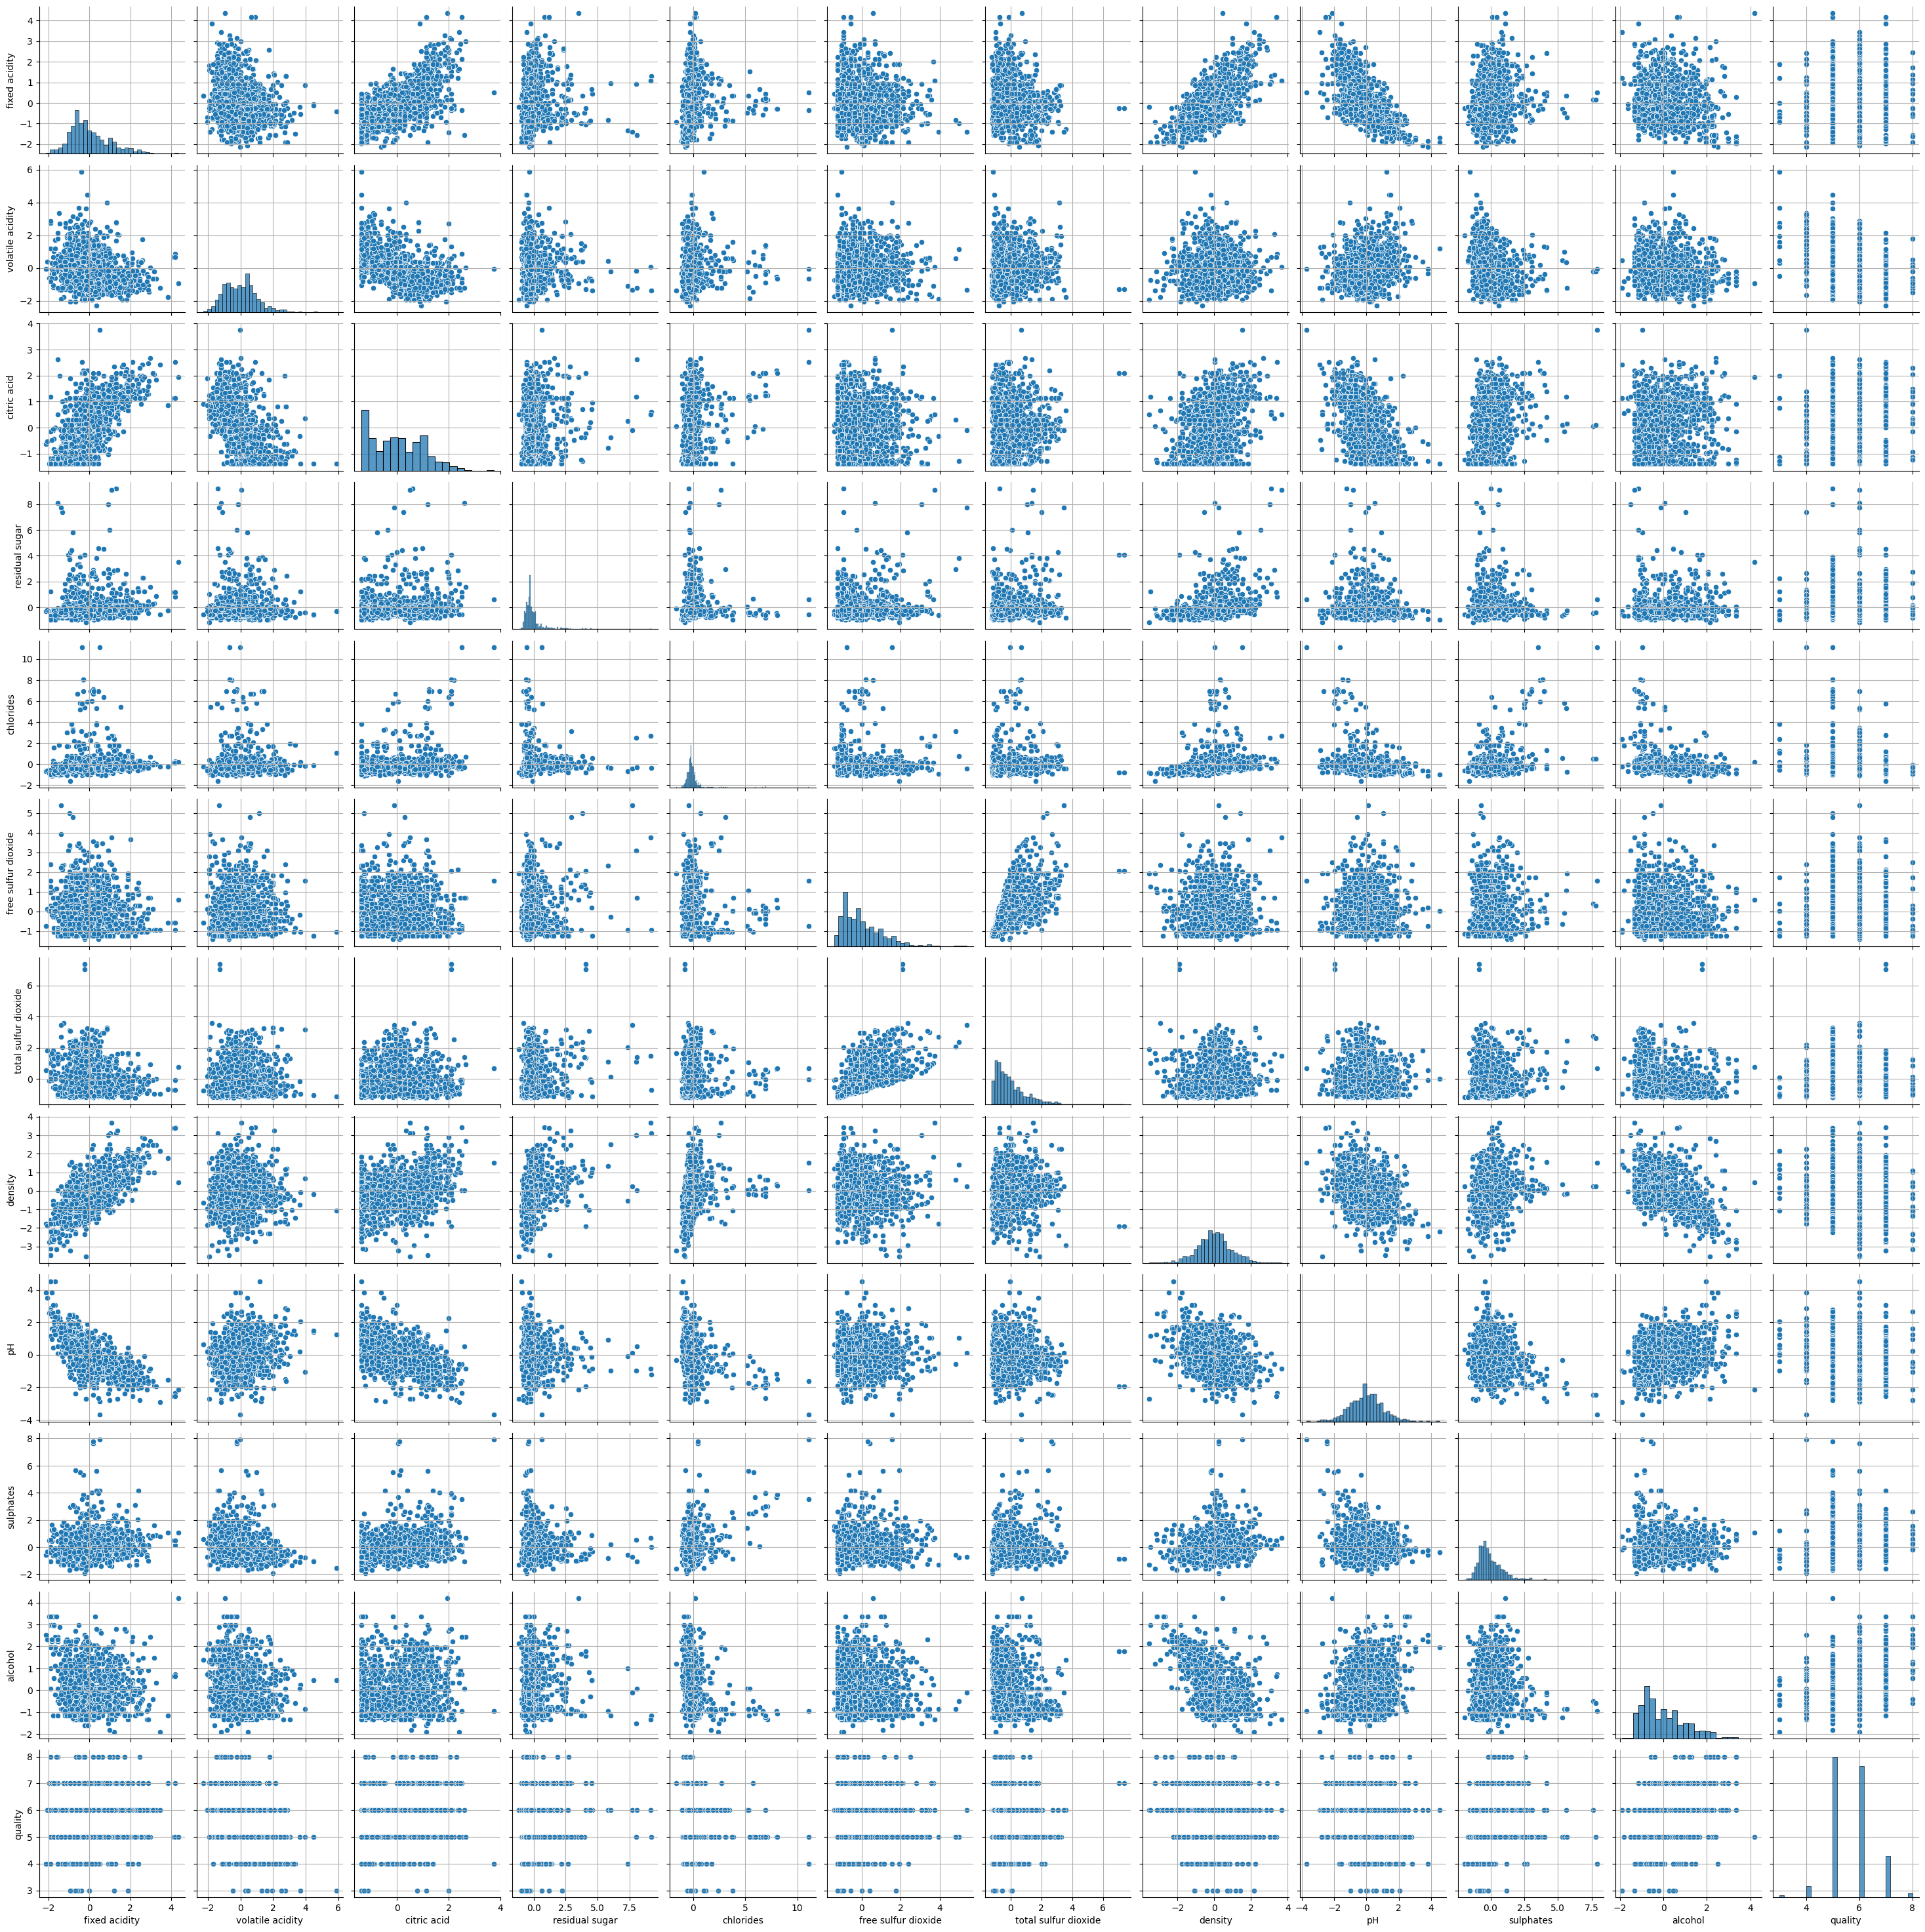

In [81]:
sns.pairplot(df_z)

### Example Feature Distribution

In [62]:
def sns_histplot(data: pd.DataFrame, x: str = ""):
    sns.histplot(
        data=data,
        x=x,
        kde=True,
        palette=sns.color_palette("bright")[:3],
    )

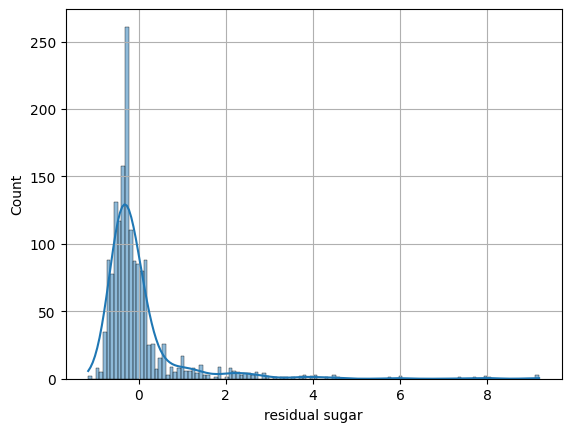

In [82]:
sns_histplot(df_z, x="residual sugar")

## Remove Outliers

In [103]:
mask = df_z[numeric_features] <= 3.0
# mask
df_z = df_z[mask.all(axis=1)]
# df_z.info()
df_z.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1463.000000       1463.000000  1463.000000     1463.000000   
mean       -0.006884         -0.026029    -0.027579       -0.106990   
std         0.946946          0.949186     0.981217        0.615132   
min        -1.907233         -2.278280    -1.391472       -1.162696   
25%        -0.700719         -0.769931    -0.929318       -0.453218   
50%        -0.241094         -0.043689    -0.107711       -0.240375   
75%         0.505795          0.584790     0.765247        0.043416   
max         2.976276          2.861279     2.665214        2.952276   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1463.000000          1463.000000           1463.000000  1463.000000   
mean     -0.129637            -0.068701             -0.079553    -0.026726   
std       0.454637             0.896312              0.898640     0.930440   
min      -1.603945            -1.422500             -1.230584    -3.538731   
25%      -0.371229            -0.848716             -0.774449    -0.607756   
50%      -0.179946            -0.274931             -0.318315    -0.024741   
75%       0.032592             0.490115              0.350683     0.558274   
max       2.944352             2.976515              2.996263     2.890335   

                pH    sulphates      alcohol      quality  
count  1463.000000  1463.000000  1463.000000  1463.000000  
mean      0.029147    -0.096453     0.001749     5.649351  
std       0.918615     0.767652     0.964802     0.801468  
min      -2.793302    -1.936507    -1.898919     3.000000  
25%      -0.590348    -0.638220    -0.866379     5.000000  
50%      -0.007213    -0.225128    -0.209308     6.000000  
75%       0.575922     0.365003     0.635497     6.000000  
max       2.843670     2.961578     2.982178     8.000000

## Plots with Outliers Removed

### Pair Plots

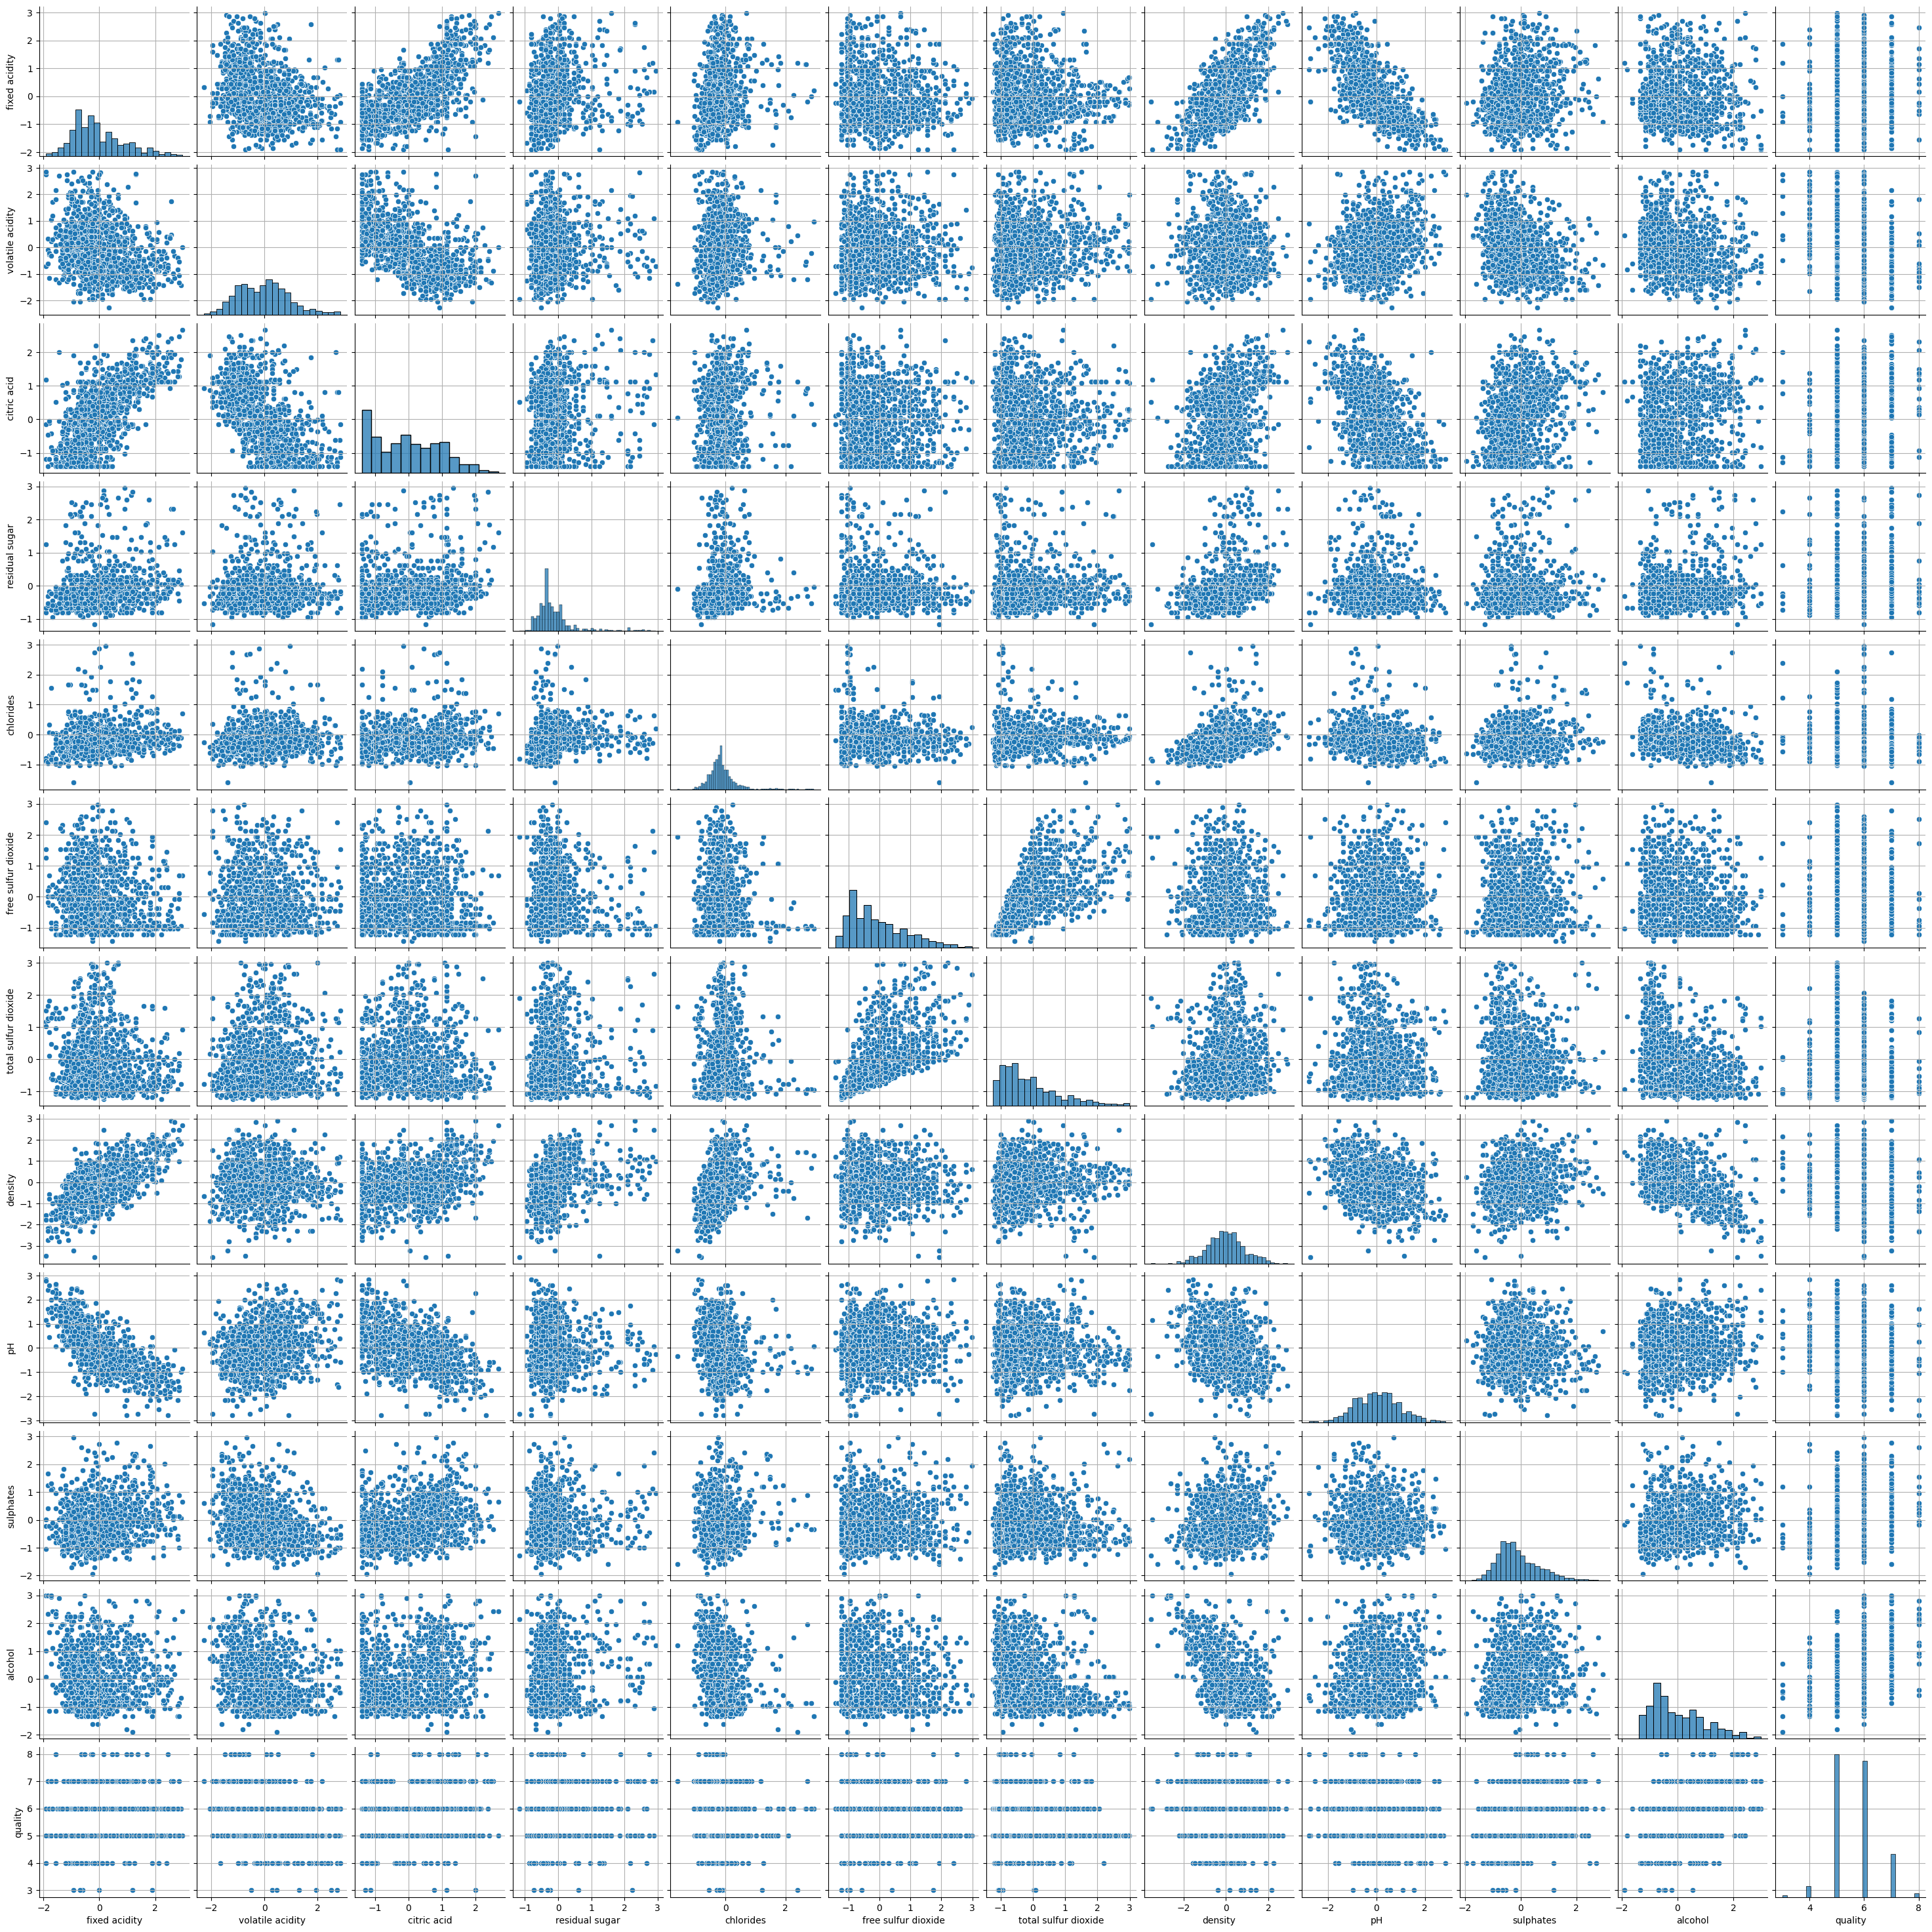

In [105]:
sns.pairplot(df_z)

### Example Feature Distribution

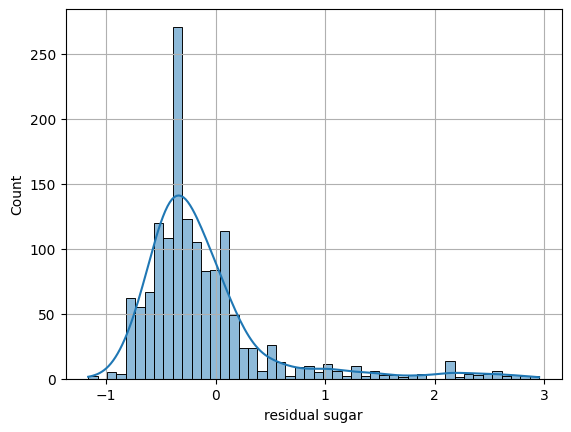

In [104]:
sns_histplot(df_z, x="residual sugar")

## Perform a Default Split

<Axes: >

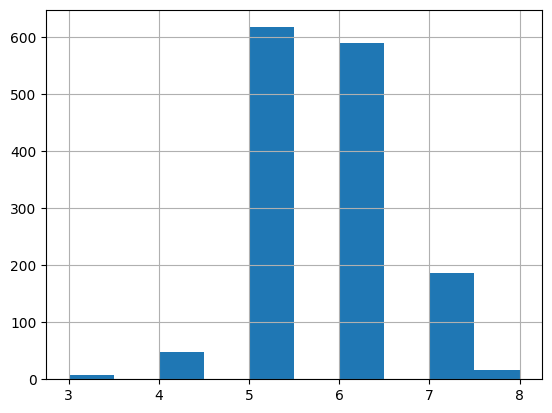

In [112]:
X = df_z[numeric_features]
y = df_z[target_feature]
y.hist()

In [113]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=42)